In [1]:
import numpy as np # linear algebra
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

In [3]:
df = pd.read_csv("TrainData.csv")


In [4]:
df

,datetime_utc,_tempm
0,6/2/2021 0:10,20.94
1,6/2/2021 1:11,20.92
2,6/2/2021 2:10,20.94
3,6/2/2021 3:11,20.92
4,6/2/2021 4:10,23.17
...,...,...
867,7/8/2021 3:10,22.85
868,7/8/2021 4:10,23.10
869,7/8/2021 5:10,23.73
870,7/8/2021 6:10,23.20


In [5]:
df[' _tempm'].value_counts()

23.04    19
23.09    16
23.02    14
23.11    14
23.03    12
         ..
23.91     1
22.93     1
23.97     1
23.98     1
24.87     1
Name:  _tempm, Length: 221, dtype: int64

In [6]:
df.corr(method ='kendall')

,_tempm
_tempm,1.0


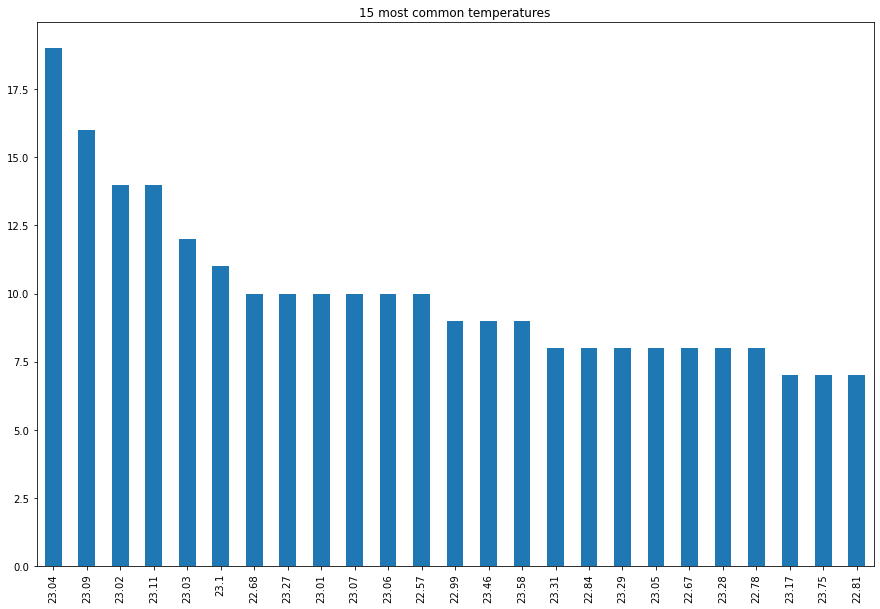

In [7]:
plt.figure(figsize=(15,10))
df[' _tempm'].value_counts().head(25).plot(kind='bar')

plt.title('15 most common temperatures')
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


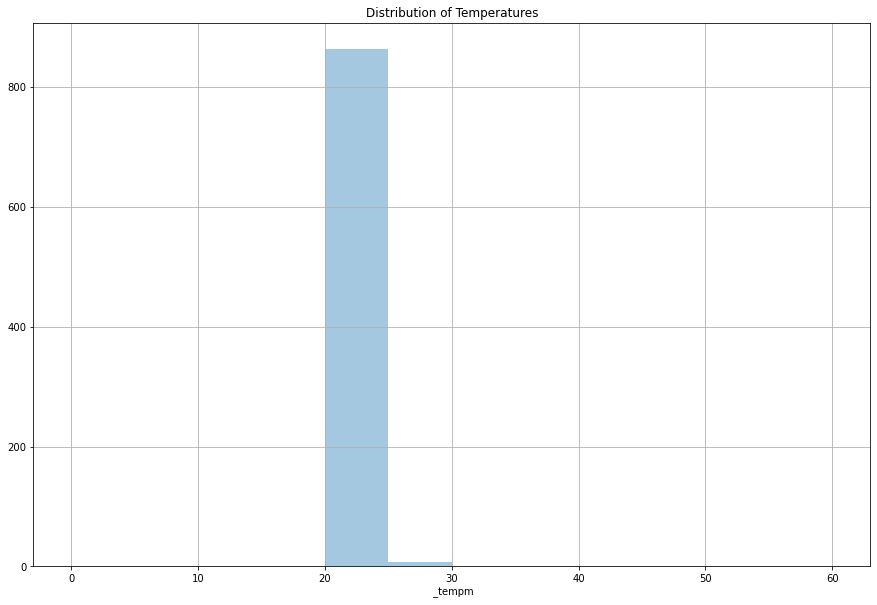

In [8]:
plt.figure(figsize=(15, 10))
sns.distplot(df[' _tempm'],bins=[i for i in range(0,61,5)], kde=False)
plt.title("Distribution of Temperatures")
plt.grid()
plt.show()

In [9]:
print(df.describe())

           _tempm
count  872.000000
mean    23.239335
std      0.582745
min     20.920000
25%     22.837500
50%     23.120000
75%     23.560000
max     25.420000


In [10]:
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])

In [11]:
df['datetime_utc']

0     2021-06-02 00:10:00
1     2021-06-02 01:11:00
2     2021-06-02 02:10:00
3     2021-06-02 03:11:00
4     2021-06-02 04:10:00
              ...        
867   2021-07-08 03:10:00
868   2021-07-08 04:10:00
869   2021-07-08 05:10:00
870   2021-07-08 06:10:00
871   2021-07-08 07:11:00
Name: datetime_utc, Length: 872, dtype: datetime64[ns]

In [12]:
# imputing the missing value in temperatre feature with mean.
df[' _tempm'].fillna(df[' _tempm'].mean(), inplace=True)

In [13]:
df[' _tempm'].isna().sum()
# filled all missing values with mean()

0

In [14]:
str(df['datetime_utc'][1:])

'1     2021-06-02 01:11:00\n2     2021-06-02 02:10:00\n3     2021-06-02 03:11:00\n4     2021-06-02 04:10:00\n5     2021-06-02 05:10:00\n              ...        \n867   2021-07-08 03:10:00\n868   2021-07-08 04:10:00\n869   2021-07-08 05:10:00\n870   2021-07-08 06:10:00\n871   2021-07-08 07:11:00\nName: datetime_utc, Length: 871, dtype: datetime64[ns]'

In [15]:
# a function to extract year part from the whole date
def get_year(x):
  return x[0:4]

In [16]:
# a function to extract month part from the whole date
def get_month(x):
  return x[5:7]

In [17]:
def get_day(x):
  return x[8:10]

In [18]:
def get_time(x):
  return x[10:13]

In [19]:
# making two new features year and month
df['year'] = df['datetime_utc'].apply(lambda x: get_year(str(x)))
df['month'] = df['datetime_utc'].apply(lambda x: get_month(str(x)))
df['day'] = df['datetime_utc'].apply(lambda x: get_day(str(x)))
df['time'] = df['datetime_utc'].apply(lambda x: get_time(str(x)))

In [20]:
df['year']

0      2021
1      2021
2      2021
3      2021
4      2021
       ... 
867    2021
868    2021
869    2021
870    2021
871    2021
Name: year, Length: 872, dtype: object

In [21]:
df['month'].value_counts()

06    696
07    176
Name: month, dtype: int64

In [22]:
df['day']

0      02
1      02
2      02
3      02
4      02
       ..
867    08
868    08
869    08
870    08
871    08
Name: day, Length: 872, dtype: object

In [23]:
df['time'][23:]

23      23
24      00
25      01
26      02
27      03
      ... 
867     03
868     04
869     05
870     06
871     07
Name: time, Length: 849, dtype: object

In [24]:
temp_year = pd.crosstab(df['year'], df['month'], values=df[' _tempm'], aggfunc='mean')
temp_year

month,06,07
year,,
2021,23.18296,23.462273


In [25]:
# taking only temperature feature as values and datetime feature as index in the dataframe for time series forecasting of temperature
data = pd.DataFrame(list(df[' _tempm']), index=df['datetime_utc'], columns=['temp'])


In [26]:
data

,temp
datetime_utc,
2021-06-02 00:10:00,20.94
2021-06-02 01:11:00,20.92
2021-06-02 02:10:00,20.94
2021-06-02 03:11:00,20.92
2021-06-02 04:10:00,23.17
...,...
2021-07-08 03:10:00,22.85
2021-07-08 04:10:00,23.10
2021-07-08 05:10:00,23.73


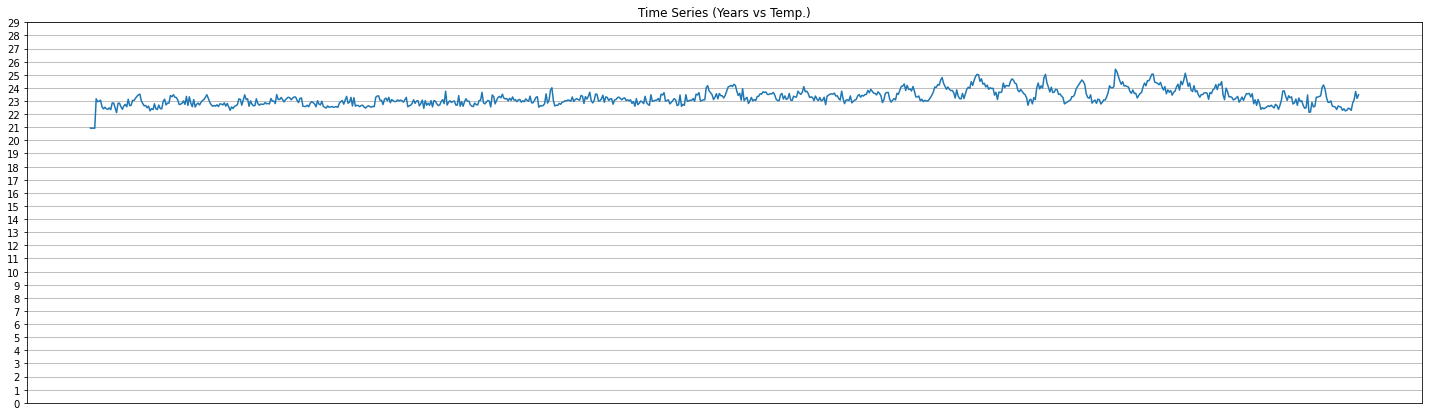

In [27]:
plt.figure(figsize=(25, 7))
plt.plot(data)
plt.grid()
plt.yticks(np.arange(30))
plt.xticks(np.arange(1))
plt.title("Time Series (Years vs Temp.)")
plt.show()

<ipython-input-28-dbbbce307df5>:4: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  sgt.plot_acf(np.array(data.iloc[:,0:1]),


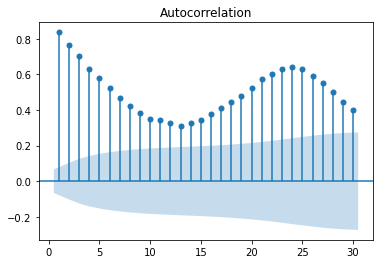

In [28]:
#Auto Correlation
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(np.array(data.iloc[:,0:1]),
            ax=None,
            lags=None,
            alpha=0.05,
            use_vlines=True,
            unbiased=False,
            fft=False,
            missing='none',
            title='Autocorrelation',
            zero=False,  # Not including the 1st term as its acf w.r.t. itself will always be 1.
            vlines_kwargs=None)
plt.show()

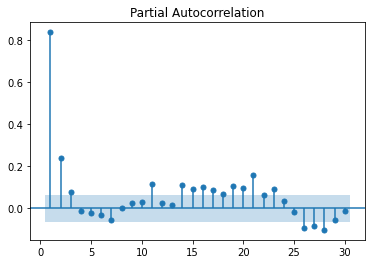

In [29]:
#Partial Auto-correlation 

sgt.plot_pacf(np.array(data.iloc[:,0:1]),
            ax=None,
            lags=None,
            alpha=0.05,
            method='ols',
            use_vlines=True,
            title='Partial Autocorrelation',
            zero=False,    # Not including the 1st term as its pacf w.r.t. itself will always be 1.
            vlines_kwargs=None)
plt.show()

In [30]:
# Scaling data to get rid of outliers
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(-1,1))
data_scaled = scalar.fit_transform(data)

In [31]:
data_scaled

array([[-0.99111111],
       [-1.        ],
       [-0.99111111],
       [-1.        ],
       [ 0.        ],
       [-0.09777778],
       [-0.08      ],
       [-0.04888889],
       [-0.27111111],
       [-0.34222222],
       [-0.28444444],
       [-0.34222222],
       [-0.36      ],
       [-0.30666667],
       [-0.36888889],
       [-0.14222222],
       [-0.14222222],
       [-0.31111111],
       [-0.47111111],
       [-0.15555556],
       [-0.14666667],
       [-0.27111111],
       [-0.35555556],
       [-0.24      ],
       [-0.19111111],
       [-0.27111111],
       [-0.01777778],
       [-0.23555556],
       [-0.21777778],
       [-0.05333333],
       [-0.05777778],
       [ 0.01777778],
       [ 0.08444444],
       [ 0.12888889],
       [ 0.16      ],
       [-0.06222222],
       [-0.16444444],
       [-0.24      ],
       [-0.22666667],
       [-0.30666667],
       [-0.24888889],
       [-0.40888889],
       [-0.33333333],
       [-0.36444444],
       [-0.16888889],
       [-0

In [32]:
steps = 24
inp = []
out = []
for i in range(len(data_scaled)- (steps)):
    inp.append(data_scaled[i:i+steps])
    out.append(data_scaled[i+steps])

In [33]:
inp=np.asanyarray(inp)
out=np.asanyarray(out)

In [34]:
x_train = inp[:500]
x_test = inp[500:]
y_train = out[:500]
y_test= out[500:]


In [35]:
inp.shape

(848, 24, 1)

In [36]:
y_train.shape

(500, 1)

In [37]:
x_test.shape

(348, 24, 1)

In [38]:
#x_test

In [39]:
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping
early_stop = EarlyStopping(monitor = "loss", mode = "min", patience = 5, restore_best_weights = True)
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(24,1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(24))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [40]:
history = model.fit(x_train,y_train,epochs=40, verbose=1, callbacks = [early_stop] )

Epoch 1/40
16/16 [==============================] - 7s 131ms/step - loss: 0.0238
Epoch 2/40
16/16 [==============================] - 2s 126ms/step - loss: 0.0211
Epoch 3/40
16/16 [==============================] - 2s 124ms/step - loss: 0.0185
Epoch 4/40
16/16 [==============================] - 2s 129ms/step - loss: 0.0156
Epoch 5/40
16/16 [==============================] - 2s 121ms/step - loss: 0.0136
Epoch 6/40
16/16 [==============================] - 2s 121ms/step - loss: 0.0135
Epoch 7/40
16/16 [==============================] - 2s 124ms/step - loss: 0.0121
Epoch 8/40
16/16 [==============================] - 2s 128ms/step - loss: 0.0124
Epoch 9/40
16/16 [==============================] - 2s 123ms/step - loss: 0.0128
Epoch 10/40
16/16 [==============================] - 2s 126ms/step - loss: 0.0120
Epoch 11/40
16/16 [==============================] - 2s 143ms/step - loss: 0.0108
Epoch 12/40
16/16 [==============================] - 2s 155ms/step - loss: 0.0097
Epoch 13/40
16/16 [======

In [41]:
model.save("LSTMmodel.hdf5")

In [42]:
predict = model.predict(x_test)


In [43]:
predict = scalar.inverse_transform(predict)

In [44]:
Ytesting = scalar.inverse_transform(y_test)

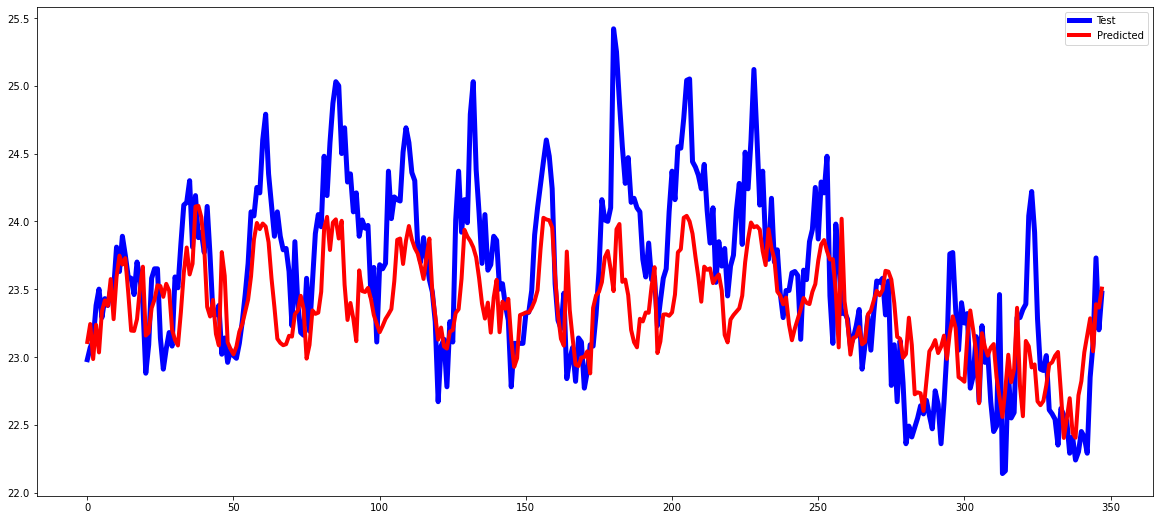

In [45]:
plt.figure(figsize=(20,9))
plt.plot(Ytesting , 'blue', linewidth=5)
plt.plot(predict,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Ytesting, predict)

0.25011532303671574

##TARGET

In [47]:
df1 = pd.DataFrame({"datetime_utc":['7-8-2021 7:11','7-8-2021 8:11','7-8-2021 9:11','7-8-2021 10:11','7-8-2021 11:11','7-8-2021 12:11','7-8-2021 13:11','7-8-2021 14:11','7-8-2021 15:11','7-8-2021 16:11','7-8-2021 17:11','7-8-2021 18:11','7-8-2021 19:11','7-8-2021 20:11','7-8-2021 21:11','7-8-2021 22:11','7-8-2021 23:11','8-8-2021 00:00','8-8-2021 01:00','8-8-2021 02:00','8-8-2021 03:00','8-8-2021 04:00','8-8-2021 05:00','8-8-2021 06:00'],
                    "temp":['20.94','20.92','20.94','20.92','23.17','22.95','22.99','23.06','22.56','22.40','22.53','22.40','22.36','22.48','22.34','22.85','22.85','20.94','20.92','20.34','20.42','21.33','21.28','22.31']})

In [48]:
df1['datetime_utc'] = pd.to_datetime(df1.datetime_utc)
df1


,datetime_utc,temp
0,2021-07-08 07:11:00,20.94
1,2021-07-08 08:11:00,20.92
2,2021-07-08 09:11:00,20.94
3,2021-07-08 10:11:00,20.92
4,2021-07-08 11:11:00,23.17
5,2021-07-08 12:11:00,22.95
6,2021-07-08 13:11:00,22.99
7,2021-07-08 14:11:00,23.06
8,2021-07-08 15:11:00,22.56
9,2021-07-08 16:11:00,22.40


In [49]:

df1 = df1.set_index('datetime_utc')
df1

,temp
datetime_utc,
2021-07-08 07:11:00,20.94
2021-07-08 08:11:00,20.92
2021-07-08 09:11:00,20.94
2021-07-08 10:11:00,20.92
2021-07-08 11:11:00,23.17
2021-07-08 12:11:00,22.95
2021-07-08 13:11:00,22.99
2021-07-08 14:11:00,23.06
2021-07-08 15:11:00,22.56


In [50]:
data.index

DatetimeIndex(['2021-06-02 00:10:00', '2021-06-02 01:11:00',
               '2021-06-02 02:10:00', '2021-06-02 03:11:00',
               '2021-06-02 04:10:00', '2021-06-02 05:10:00',
               '2021-06-02 06:10:00', '2021-06-02 07:10:00',
               '2021-06-02 08:10:00', '2021-06-02 09:10:00',
               ...
               '2021-07-07 22:11:00', '2021-07-07 23:10:00',
               '2021-07-08 00:10:00', '2021-07-08 01:10:00',
               '2021-07-08 02:10:00', '2021-07-08 03:10:00',
               '2021-07-08 04:10:00', '2021-07-08 05:10:00',
               '2021-07-08 06:10:00', '2021-07-08 07:11:00'],
              dtype='datetime64[ns]', name='datetime_utc', length=872, freq=None)

In [51]:
data.columns , df1.columns

(Index(['temp'], dtype='object'), Index(['temp'], dtype='object'))

In [52]:

data = data.loc[~data.index.duplicated(keep='first')]
df1 = df1.loc[~df1.index.duplicated(keep='first')]

In [53]:
added_df = pd.concat([data, df1], axis=0)
added_df.tail(30)


,temp
datetime_utc,
2021-07-08 02:10:00,22.29
2021-07-08 03:10:00,22.85
2021-07-08 04:10:00,23.1
2021-07-08 05:10:00,23.73
2021-07-08 06:10:00,23.2
2021-07-08 07:11:00,23.47
2021-07-08 07:11:00,20.94
2021-07-08 08:11:00,20.92
2021-07-08 09:11:00,20.94


In [54]:
data_scaled = scalar.fit_transform(added_df)
data_scaled

array([[-0.76377953],
       [-0.77165354],
       [-0.76377953],
       [-0.77165354],
       [ 0.11417323],
       [ 0.02755906],
       [ 0.04330709],
       [ 0.07086614],
       [-0.12598425],
       [-0.18897638],
       [-0.13779528],
       [-0.18897638],
       [-0.20472441],
       [-0.15748031],
       [-0.21259843],
       [-0.01181102],
       [-0.01181102],
       [-0.16141732],
       [-0.30314961],
       [-0.02362205],
       [-0.01574803],
       [-0.12598425],
       [-0.2007874 ],
       [-0.0984252 ],
       [-0.05511811],
       [-0.12598425],
       [ 0.0984252 ],
       [-0.09448819],
       [-0.07874016],
       [ 0.06692913],
       [ 0.06299213],
       [ 0.12992126],
       [ 0.18897638],
       [ 0.22834646],
       [ 0.25590551],
       [ 0.05905512],
       [-0.03149606],
       [-0.0984252 ],
       [-0.08661417],
       [-0.15748031],
       [-0.10629921],
       [-0.2480315 ],
       [-0.18110236],
       [-0.20866142],
       [-0.03543307],
       [-0

In [55]:
x_tr = inp[701:845]
x_t = inp[845:]
y_tr = out[701:845]
y_t = out[845:]


In [56]:
history = model.fit(x_tr,y_tr,epochs=40, verbose=1, callbacks = [early_stop] )

Epoch 1/40
5/5 [==============================] - 1s 155ms/step - loss: 0.0419
Epoch 2/40
5/5 [==============================] - 1s 161ms/step - loss: 0.0279
Epoch 3/40
5/5 [==============================] - 1s 146ms/step - loss: 0.0328
Epoch 4/40
5/5 [==============================] - 1s 140ms/step - loss: 0.0269
Epoch 5/40
5/5 [==============================] - 1s 131ms/step - loss: 0.0359
Epoch 6/40
5/5 [==============================] - 1s 135ms/step - loss: 0.0315
Epoch 7/40
5/5 [==============================] - 1s 133ms/step - loss: 0.0322
Epoch 8/40
5/5 [==============================] - 1s 133ms/step - loss: 0.0178
Epoch 9/40
5/5 [==============================] - 1s 136ms/step - loss: 0.0132
Epoch 10/40
5/5 [==============================] - 1s 139ms/step - loss: 0.0134
Epoch 11/40
5/5 [==============================] - 1s 145ms/step - loss: 0.0092
Epoch 12/40
5/5 [==============================] - 1s 135ms/step - loss: 0.0077
Epoch 13/40
5/5 [==============================] 

In [57]:
predict = model.predict(x_t)

In [58]:
predict = scalar.inverse_transform(predict)

In [59]:
Ytest = scalar.inverse_transform(y_t)

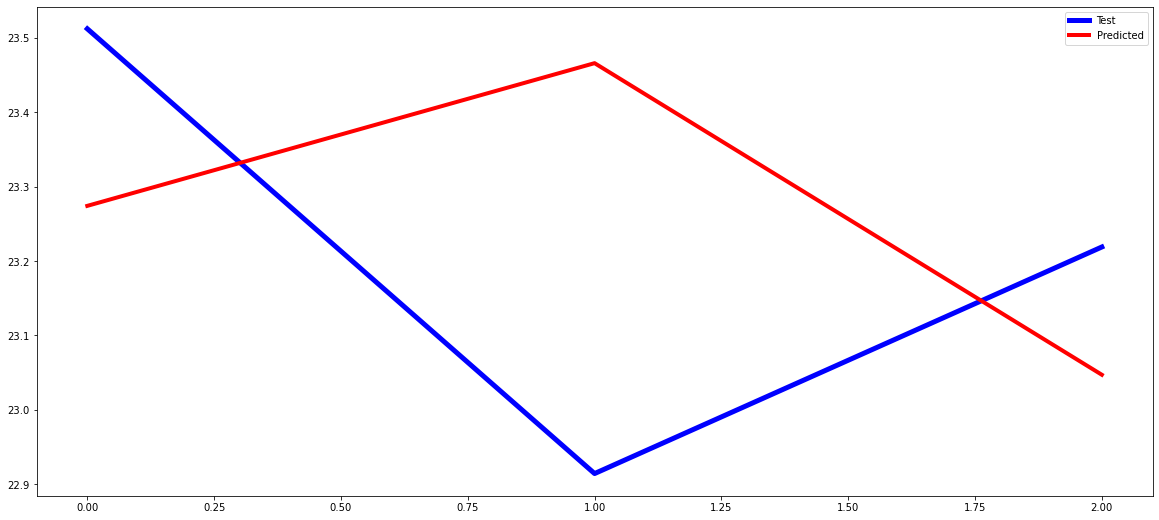

In [60]:
plt.figure(figsize=(20,9))
plt.plot(Ytest , 'blue', linewidth=5)
plt.plot(predict,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.show()

In [61]:
added_df.index


DatetimeIndex(['2021-06-02 00:10:00', '2021-06-02 01:11:00',
               '2021-06-02 02:10:00', '2021-06-02 03:11:00',
               '2021-06-02 04:10:00', '2021-06-02 05:10:00',
               '2021-06-02 06:10:00', '2021-06-02 07:10:00',
               '2021-06-02 08:10:00', '2021-06-02 09:10:00',
               ...
               '2021-07-08 21:11:00', '2021-07-08 22:11:00',
               '2021-07-08 23:11:00', '2021-08-08 00:00:00',
               '2021-08-08 01:00:00', '2021-08-08 02:00:00',
               '2021-08-08 03:00:00', '2021-08-08 04:00:00',
               '2021-08-08 05:00:00', '2021-08-08 06:00:00'],
              dtype='datetime64[ns]', name='datetime_utc', length=893, freq=None)

In [62]:
df1.index

DatetimeIndex(['2021-07-08 07:11:00', '2021-07-08 08:11:00',
               '2021-07-08 09:11:00', '2021-07-08 10:11:00',
               '2021-07-08 11:11:00', '2021-07-08 12:11:00',
               '2021-07-08 13:11:00', '2021-07-08 14:11:00',
               '2021-07-08 15:11:00', '2021-07-08 16:11:00',
               '2021-07-08 17:11:00', '2021-07-08 18:11:00',
               '2021-07-08 19:11:00', '2021-07-08 20:11:00',
               '2021-07-08 21:11:00', '2021-07-08 22:11:00',
               '2021-07-08 23:11:00', '2021-08-08 00:00:00',
               '2021-08-08 01:00:00', '2021-08-08 02:00:00',
               '2021-08-08 03:00:00', '2021-08-08 04:00:00',
               '2021-08-08 05:00:00', '2021-08-08 06:00:00'],
              dtype='datetime64[ns]', name='datetime_utc', freq=None)

In [63]:
df2 = pd.DataFrame({"datetime_utc":['12-11-2021 00:00','12-11-2021 01:00','12-11-2021 02:00','12-11-2021 03:00','12-11-2021 04:00','12-11-2021 05:00','12-11-2021 06:00','12-11-2021 07:00','12-11-2021 08:00','12-11-2021 09:00','12-11-2021 10:00','12-11-2021 11:00','12-11-2021 12:00','12-11-2021 13:00','12-11-2021 14:00','12-11-2021 15:00','12-11-2021 16:00','12-11-2021 17:00','12-11-2021 18:00','12-11-2021 19:00','12-11-2021 20:00','12-11-2021 21:00','12-11-2021 22:00','12-11-2021 23:00','12-12-2021 00:00'],
                    "temp":['23.00','23.00','22.00','22.00','22.00','22.00','21.00','22.00','23.00','25.00','27.00','30.00','31.00','31.00','33.00','33.00','33.00','31.00','29.00','27.00','26.00','25.00','24.00','24.00','25.00']})

In [64]:
df2.describe

<bound method NDFrame.describe of         datetime_utc   temp
0   12-11-2021 00:00  23.00
1   12-11-2021 01:00  23.00
2   12-11-2021 02:00  22.00
3   12-11-2021 03:00  22.00
4   12-11-2021 04:00  22.00
5   12-11-2021 05:00  22.00
6   12-11-2021 06:00  21.00
7   12-11-2021 07:00  22.00
8   12-11-2021 08:00  23.00
9   12-11-2021 09:00  25.00
10  12-11-2021 10:00  27.00
11  12-11-2021 11:00  30.00
12  12-11-2021 12:00  31.00
13  12-11-2021 13:00  31.00
14  12-11-2021 14:00  33.00
15  12-11-2021 15:00  33.00
16  12-11-2021 16:00  33.00
17  12-11-2021 17:00  31.00
18  12-11-2021 18:00  29.00
19  12-11-2021 19:00  27.00
20  12-11-2021 20:00  26.00
21  12-11-2021 21:00  25.00
22  12-11-2021 22:00  24.00
23  12-11-2021 23:00  24.00
24  12-12-2021 00:00  25.00>

In [65]:
df2['datetime_utc'] = pd.to_datetime(df2.datetime_utc)
df2 = df2.set_index('datetime_utc')



In [66]:
df2.columns

Index(['temp'], dtype='object')

In [67]:

df2.sort_index(inplace=True)
df2 

,temp
datetime_utc,
2021-12-11 00:00:00,23.00
2021-12-11 01:00:00,23.00
2021-12-11 02:00:00,22.00
2021-12-11 03:00:00,22.00
2021-12-11 04:00:00,22.00
2021-12-11 05:00:00,22.00
2021-12-11 06:00:00,21.00
2021-12-11 07:00:00,22.00
2021-12-11 08:00:00,23.00


In [68]:
train = df2[:24]
test = df2[24:]

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [70]:
df2.head() , df2.tail()

(                      temp
 datetime_utc              
 2021-12-11 00:00:00  23.00
 2021-12-11 01:00:00  23.00
 2021-12-11 02:00:00  22.00
 2021-12-11 03:00:00  22.00
 2021-12-11 04:00:00  22.00,
                       temp
 datetime_utc              
 2021-12-11 20:00:00  26.00
 2021-12-11 21:00:00  25.00
 2021-12-11 22:00:00  24.00
 2021-12-11 23:00:00  24.00
 2021-12-12 00:00:00  25.00)

In [71]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [72]:
scaled_train[:]

array([[0.16666667],
       [0.16666667],
       [0.08333333],
       [0.08333333],
       [0.08333333],
       [0.08333333],
       [0.        ],
       [0.08333333],
       [0.16666667],
       [0.33333333],
       [0.5       ],
       [0.75      ],
       [0.83333333],
       [0.83333333],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.83333333],
       [0.66666667],
       [0.5       ],
       [0.41666667],
       [0.33333333],
       [0.25      ],
       [0.25      ]])

In [73]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [74]:
n_input = 23
n_features = 1
generator = TimeseriesGenerator(scaled_train , scaled_train , length = n_input , batch_size =1)


In [75]:
x,y = generator[0]
print(f'Given the array : \n {x.flatten()}')
print(f'Predict this y : \n {y}')

Given the array : 
 [0.16666667 0.16666667 0.08333333 0.08333333 0.08333333 0.08333333
 0.         0.08333333 0.16666667 0.33333333 0.5        0.75
 0.83333333 0.83333333 1.         1.         1.         0.83333333
 0.66666667 0.5        0.41666667 0.33333333 0.25      ]
Predict this y : 
 [[0.25]]


In [76]:
x.shape

(1, 23, 1)

In [77]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [78]:
model = Sequential()
model.add(LSTM(100 , activation='relu' , input_shape= (n_input , n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam'  ,loss='mse')


In [79]:
model.fit(generator,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 706ms/step - loss: 0.0743
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0643
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 0.0555
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0475
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 0.0403
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 0.0338
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0278
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 0.0224
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0174
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 0.0127
Epoch 11/100
1/1 [==============================] - 0s 17ms/step - loss: 0.0085
Epoch 12/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0050
Epoch 13/100
1/1 [==============================

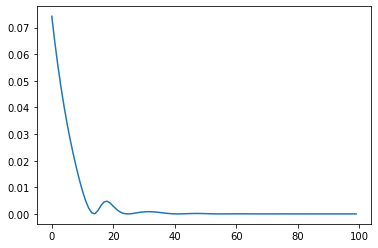

In [80]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)